Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


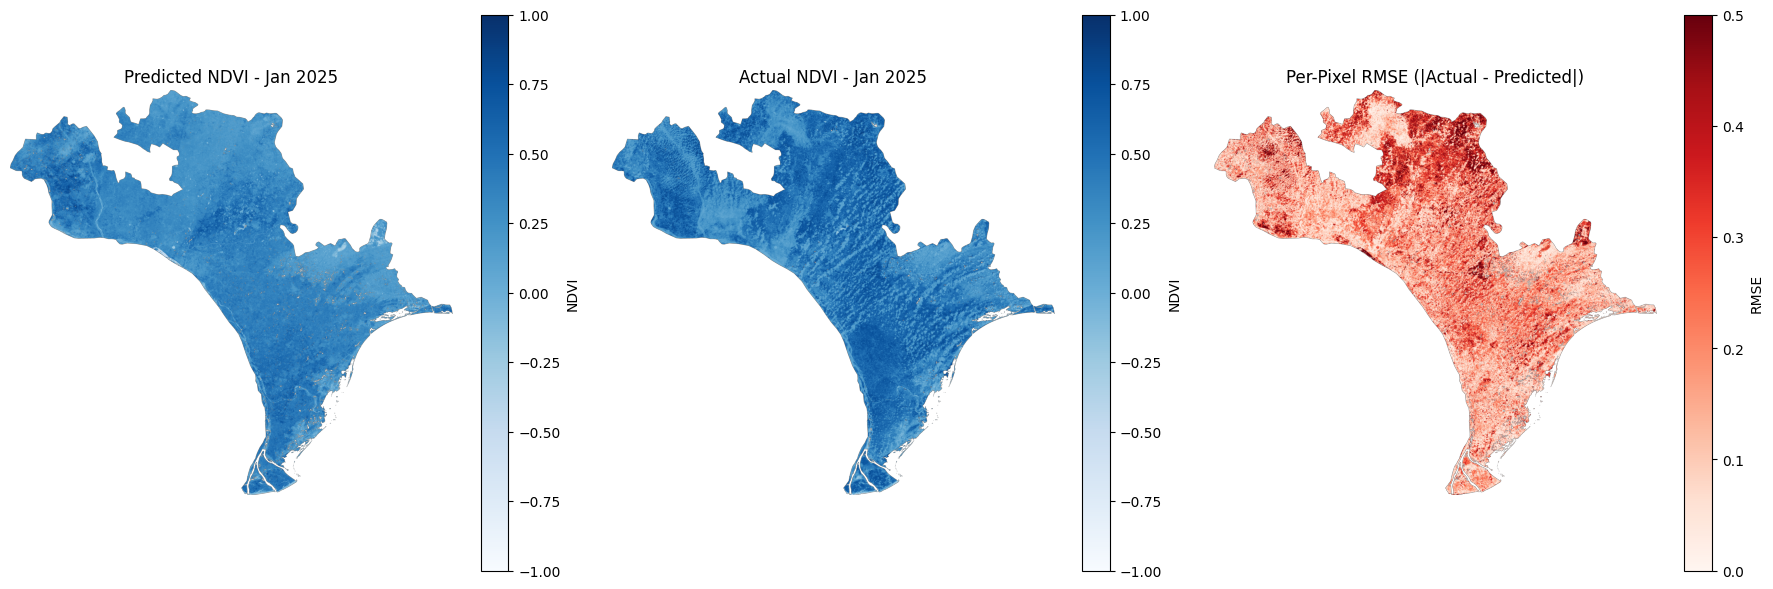

In [15]:
! pip install rasterio tensorflow scikit-learn tqdm

import numpy as np
import rasterio
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive
drive.mount('/content/drive')
# 1. Load both rasters
predicted_path = r"/content/drive/MyDrive/predicted_ndvi_jan_2025.tif"
actual_path = r"/content/drive/MyDrive/NDVI_LSTM/NDVI_01_January_2025_Krishna.tif"

with rasterio.open(predicted_path) as src:
    predicted = src.read(1)
    profile = src.profile


with rasterio.open(actual_path) as src:
    actual = src.read(1)

# 2. Visual comparison - Side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Predicted NDWI
im1 = ax1.imshow(predicted, cmap='Blues', vmin=-1, vmax=1)
ax1.set_title('Predicted NDVI - Jan 2025')
ax1.axis('off')
plt.colorbar(im1, ax=ax1, label='NDVI')

# Actual NDWI
im2 = ax2.imshow(actual, cmap='Blues', vmin=-1, vmax=1)
ax2.set_title('Actual NDVI - Jan 2025')
ax2.axis('off')
plt.colorbar(im2, ax=ax2, label='NDVI')

# Replace this section in your code

# Compute squared error per pixel, ignoring NaNs
error_squared = np.where(~np.isnan(predicted) & ~np.isnan(actual), (actual - predicted) ** 2, np.nan)
rmse_map = np.sqrt(error_squared)  # This is effectively abs(error) for a single timestep

# Plot RMSE map
im3 = ax3.imshow(rmse_map, cmap='Reds', vmin=0, vmax=0.5)
ax3.set_title('Per-Pixel RMSE (|Actual - Predicted|)')
ax3.axis('off')
plt.colorbar(im3, ax=ax3, label='RMSE')

plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ndvi_jan_2025.png", dpi=300)
plt.show()